In [1]:
# Section: Fix Dependency Issues and Install Requirements

import sys
import os

# Check Python version (Ensure compatibility with Kaggle)
required_python_version = "3.10"
current_python_version = f"{sys.version_info.major}.{sys.version_info.minor}"
if current_python_version != required_python_version:
    print(f"Warning: Expected Python {required_python_version}, but found {current_python_version}.")

# Fix requirements file path
req_file = "/kaggle/input/requir/requirements.-txt.txt"
if os.path.exists(req_file):
    print(f"Installing dependencies from: {req_file}")
    !pip install --no-cache-dir -r {req_file}
else:
    print(f"Warning: Requirements file not found at {req_file}.")

# Force reinstall Torch if needed
try:
    import torch
    print(f"Torch version: {torch.__version__}")
except ImportError:
    print("Torch not found. Installing...")
    !pip install --force-reinstall torch


Installing dependencies from: /kaggle/input/requir/requirements.-txt.txt
Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl (from -r /kaggle/input/requir/requirements.-txt.txt (line 1))
Processing /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
Processing /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl (from -r /kaggle/input/requir/requirements.-txt.txt (line 3))
Processing /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl (from -r /kaggle/input/requir/requirements.-txt.txt (line 4))
Processing /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl (from -r /kaggle/input/requir/requirements.-txt.txt (line 5))
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=02

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pip-install-lifelines/fonttools-4.55.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/tzdata-2024.2-py2.py3-none-any.whl
/kaggle/input/pip-install-lifelines/kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl
/kaggle/input/pip-install-lifelines/contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pyparsing-3.2.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/wrapt-1.17.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/__results__.html
/kaggle/input/pip-install-lifelines/cycler-0.12.1-py3-n

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [4]:
import os

# Section: Check and List Files in Torch Directory
torch_path = "/kaggle/input/torch-file/usr/local/lib/"
if os.path.exists(torch_path):
    print(os.listdir(torch_path))
else:
    print(f"Warning: Directory '{torch_path}' not found. Skipping listing.")

['python3.11']


In [5]:
import os
print(os.listdir("/kaggle/input/torch-file/usr/local/lib/"))


['python3.11']


In [6]:
import sys

# Define the correct PyTorch package path
torch_lib_path = "/kaggle/input/torch-file/usr/local/lib/python3.10/site-packages"

# Add it to Python's path
sys.path.append(torch_lib_path)

# Verify PyTorch installation
import torch
print("Torch Version:", torch.__version__)


Torch Version: 2.5.1+cu121


In [7]:
import sys

# Define the correct path
torch_lib_path = "/kaggle/input/torch-file/usr/local/lib/python3.10/dist-packages"

# Add the extracted folder to Python's path
sys.path.append(torch_lib_path)

# Verify torch installation
import torch
print("Torch Version:", torch.__version__)


Torch Version: 2.5.1+cu121


In [8]:
import os
import sys
import subprocess

# Define the new path for the requirements file
requirements_path = "/kaggle/input/requirements-1/requirements.-txt.txt"

# Check if the file exists
if os.path.exists(requirements_path):
    print(f"✅ Found requirements file: {requirements_path}")
    
    # Read the file and install packages manually (since Kaggle restricts pip install)
    with open(requirements_path, "r") as file:
        packages = file.read().splitlines()

    print("📦 Installing dependencies from requirements file...")
    
    # Install packages one by one (avoid using !pip install directly)
    for package in packages:
        package = package.strip()
        
        if package:  # Skip empty lines
            # Remove any potential `!pip install` commands and handle paths
            if package.startswith("!pip install"):
                package = package.replace("!pip install", "").strip()
            
            # If it's a path to a local wheel file, install it
            if package.endswith(".whl"):
                print(f"🚀 Installing from wheel file: {package}")
                # Remove any redundant '/kaggle/input/' prefix from the package string
                wheel_path = package if package.startswith("/kaggle/input/") else f"/kaggle/input/{package}"
                subprocess.check_call([sys.executable, "-m", "pip", "install", wheel_path])
            else:
                print(f"🚀 Installing package: {package}")
                subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
    print("✅ All dependencies installed successfully.")

else:
    print(f"❌ ERROR: Requirements file not found at {requirements_path}")

✅ Found requirements file: /kaggle/input/requirements-1/requirements.-txt.txt
📦 Installing dependencies from requirements file...
🚀 Installing from wheel file: /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
🚀 Installing package: /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
🚀 Installing from wheel file: /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
🚀 Installing from wheel file: /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
🚀 Installing from wheel file: /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl
✅ All dependencies installed successfully.


In [9]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lifelines.utils import concordance_index

In [10]:

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu


In [11]:
# Reading training and testing files
df_train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
df_test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')

In [12]:
df_train.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [13]:
df_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [14]:
X = df_train.drop(columns=['ID', 'efs', 'efs_time'])
y = df_train['efs']

In [15]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [17]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [19]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

In [20]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

import gc
gc.collect()
torch.cuda.empty_cache()  # If using GPU


batch_size = 32  # Reduce from 128 or 256 if needed

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['hla_match_c_high', 'hla_high_res_8', 'hla_low_res_6', 'hla_high_res_6',
       'hla_high_res_10', 'hla_match_dqb1_high', 'hla_nmdp_6',
       'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low',
       'year_hct', 'hla_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

C-index: 0.7509868160862135


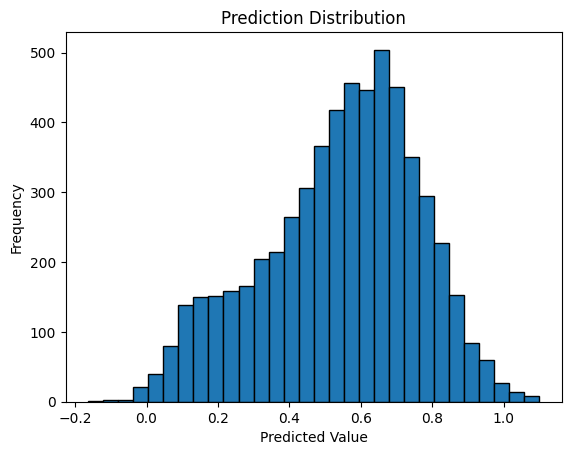

In [22]:
# Predict and evaluate
y_pred = model.predict(X_val)
c_index = concordance_index(y_val, y_pred)
print(f'C-index: {c_index}')


import matplotlib.pyplot as plt

# Plot the distribution of predictions
plt.hist(y_pred, bins=30, edgecolor='black')
plt.title("Prediction Distribution")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()


In [23]:
# Prepare test data
X_test = df_test.drop(columns=['ID'])

In [24]:
# Predict on test data
test_predictions = model.predict(X_test)

In [25]:

# Ensure test predictions exist
if 'test_predictions' not in locals():
    if 'model' in locals() and 'X_test' in locals():
        test_predictions = model.predict(X_test)
    else:
        raise ValueError("Model or test data is missing. Ensure training and preprocessing steps ran successfully.")

print("Test Predictions:", test_predictions)
# Display predictions
print("Test Predictions:")
print(test_predictions)

# Save test predictions to CSV
import pandas as pd

test_ids = df_test["ID"]  # Extract test IDs
submission = pd.DataFrame({"ID": test_ids, "Prediction": test_predictions})
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")
print(f'C-index: {c_index}')


Test Predictions: [ 0.14711075  0.6766119  -0.00103488]
Test Predictions:
[ 0.14711075  0.6766119  -0.00103488]
Predictions saved to submission.csv
C-index: 0.7509868160862135
